Refer to the instructions on Canvas for more information.

"I have neither given nor received help on this assignment."

author: Phillip McDonough

You should use the code cell below to load your data.

In [1]:
import requests
import numpy as np
from pprint import pprint
import pandas as pd
import random 
import time 

seasonAves2019 = []  
# loads the 2019 season averages of a large set of nba players 

for i in range(300):
    response = requests.get('https://www.balldontlie.io/api/v1/season_averages?season=2019&player_ids[]=' + str(i))
    response = response.json()
    if response['data'] == [] or response['data'][0]['games_played'] < 20:
        pass
    else:
        seasonAves2019.append(response['data'])
    time.sleep(1)
        
pprint(seasonAves2019)

[[{'ast': 2.32,
   'blk': 1.06,
   'dreb': 5.97,
   'fg3_pct': 0.333,
   'fg3a': 0.05,
   'fg3m': 0.02,
   'fg_pct': 0.592,
   'fga': 7.59,
   'fgm': 4.49,
   'ft_pct': 0.582,
   'fta': 3.19,
   'ftm': 1.86,
   'games_played': 63,
   'min': '26:40',
   'oreb': 3.29,
   'pf': 1.94,
   'player_id': 3,
   'pts': 10.86,
   'reb': 9.25,
   'season': 2019,
   'stl': 0.81,
   'turnover': 1.49}],
 [{'ast': 5.11,
   'blk': 1.29,
   'dreb': 7.76,
   'fg3_pct': 0.143,
   'fg3a': 0.19,
   'fg3m': 0.03,
   'fg_pct': 0.557,
   'fga': 10.97,
   'fgm': 6.11,
   'ft_pct': 0.691,
   'fta': 5.31,
   'ftm': 3.67,
   'games_played': 72,
   'min': '33:32',
   'oreb': 2.44,
   'pf': 2.53,
   'player_id': 4,
   'pts': 15.92,
   'reb': 10.21,
   'season': 2019,
   'stl': 1.14,
   'turnover': 2.83}],
 [{'ast': 2.43,
   'blk': 1.64,
   'dreb': 5.45,
   'fg3_pct': 0.389,
   'fg3a': 2.96,
   'fg3m': 1.15,
   'fg_pct': 0.493,
   'fga': 14.96,
   'fgm': 7.38,
   'ft_pct': 0.827,
   'fta': 3.6,
   'ftm': 2.98,
   'ga

I got this data from this API https://www.balldontlie.io/#introduction . This data is important to use to understand the statistical differences in NBA players and how their individual statistics translate to their performance and accomplishments on the court.

You should use the code cell below to process your data, in particular converting the data into pandas DataFrames.

In [ ]:
stats = {}
# initializes stats dictionary keys
stat1 = seasonAves2019[0][0]
for stat in stat1:
    stats[stat] = []

# adds each player's stats to their respective list values in the stats dictionary
for i in range(len(seasonAves2019)):
    playerAves = seasonAves2019[i][0]
    for stat in playerAves:
        stats[stat].append(playerAves[stat])

# loads names of players corresponding to their 'player_id' and adds the ids and names as a
# key/value pair, respectively, to the stats dictionary
Ids = stats['player_id']
pNames = []
for Id in Ids:
    response = requests.get('https://www.balldontlie.io/api/v1/players/' + str(Id))
    response = response.json()
    name = response['first_name'] +' '+ response['last_name']
    pNames.append(name)
    time.sleep(1)

stats['player_names'] = pNames 

# creates pandas dataframe
statsDF = pd.DataFrame(stats)
statsDF.index = statsDF.player_names
statsDF

You should use the code cell below to run your first machine learning technique.

In [67]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# creates linear regression model to estimate average player points based on their games played, average assists,
# average rebounds, and free throw percentage for the 2019 season
inputs = statsDF.loc[:,['games_played', 'ast', 'reb','ft_pct']]
regrModel = LinearRegression()
lm = regrModel.fit(inputs, statsDF.pts)

# adds a column to the statsDF data frame 
statsDF['pointsPredicted'] = lm.predict(inputs)

# measures error in the predicted points 
ptserrors = statsDF.pts - statsDF.pointsPredicted
print(ptserrors)

player_names
Steven Adams        -2.639501
Bam Adebayo         -5.735152
LaMarcus Aldridge    3.796682
Grayson Allen        0.733510
Jarrett Allen       -2.018065
                       ...   
Trey Lyles          -2.944186
Ian Mahinmi         -0.392043
Thon Maker           0.199731
Boban Marjanovic    -0.775213
Lauri Markkanen      2.795401
Length: 224, dtype: float64


You should use the code cell below to run your second machine learning technique.

In [68]:
# creates a kmeans cluster model and creates a data frame called norm with the zscore data for each player.
# Then adds a new column to the norm data frame with the cluster that each player falls into from the 
# kmeans model predictions
import sklearn.cluster as cl
km = cl.KMeans(n_clusters=5)
quant = statsDF.iloc[:,4:-2]
norm = (quant - quant.mean()) / quant.std()
labels = km.fit_predict(norm)
norm['CID'] = labels
norm

,fgm,fga,fg3m,fg3a,ftm,fta,oreb,dreb,reb,ast,stl,blk,turnover,pf,pts,fg_pct,fg3_pct,ft_pct,CID
player_names,,,,,,,,,,,,,,,,,,,
Steven Adams,0.372610,-0.032304,-1.138384,-1.216905,0.135973,0.528500,3.066027,1.361970,1.936063,0.104464,0.349630,1.437407,0.335435,0.155346,0.139873,1.717361,0.085062,-1.609257,4
Bam Adebayo,1.046585,0.641738,-1.127550,-1.158712,1.227852,1.570536,1.982701,2.270289,2.313027,1.562387,1.144850,1.922942,1.830650,0.898665,0.872049,1.241015,-1.436042,-0.577521,4
LaMarcus Aldridge,1.574948,1.432745,0.085901,-0.007330,0.811611,0.730026,1.337864,1.110208,1.242449,0.161945,0.036362,2.732167,0.209882,0.760080,1.301804,0.394178,0.533387,0.709784,4
Grayson Allen,-0.213997,-0.226586,0.465105,0.304416,-0.364723,-0.459467,-0.919065,-0.568206,-0.702684,-0.391962,-0.903444,-0.944027,-0.395052,-0.537579,-0.175570,0.050151,0.653474,1.088403,0
Jarrett Allen,0.297724,-0.220639,-1.160053,-1.200278,0.485857,0.857823,2.795195,1.638415,2.068000,-0.287451,-0.228712,1.969183,-0.132533,0.621495,0.170260,2.471575,-2.580872,-1.126518,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Trey Lyles,-0.484419,-0.458536,-0.044111,-0.127872,-0.672379,-0.690485,0.267435,0.700478,0.612920,-0.533051,-0.541980,-0.042319,-0.680398,-0.323403,-0.504036,-0.214485,0.517375,-0.179971,2
Ian Mahinmi,-0.646673,-0.716258,-1.051709,-1.025700,-0.159618,0.051720,0.809098,-0.212777,0.070092,-0.606208,-0.132321,0.928751,-0.383638,0.533305,-0.628477,0.407410,-1.043757,-1.259035,2
Thon Maker,-0.900453,-0.948207,-0.791684,-0.830339,-0.310430,-0.208789,-0.119468,-0.711365,-0.578286,-0.762974,-0.686566,0.327612,-0.600501,-0.310804,-0.806456,0.261860,0.173126,-0.833088,2


You should use the code cell below to run your first visualization.

<AxesSubplot:xlabel='pts', ylabel='pointsPredicted'>

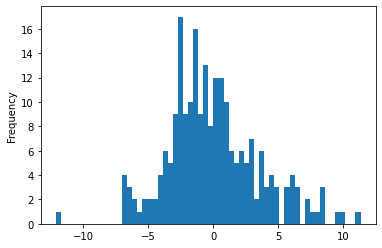

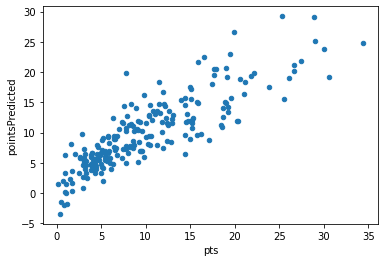

In [70]:
# graphs linear regression errors 
ptserrors.plot.hist(bins=60)
statsDF.plot.scatter(x="pts", y="pointsPredicted")

You should use the code cell below to run your second visualization.

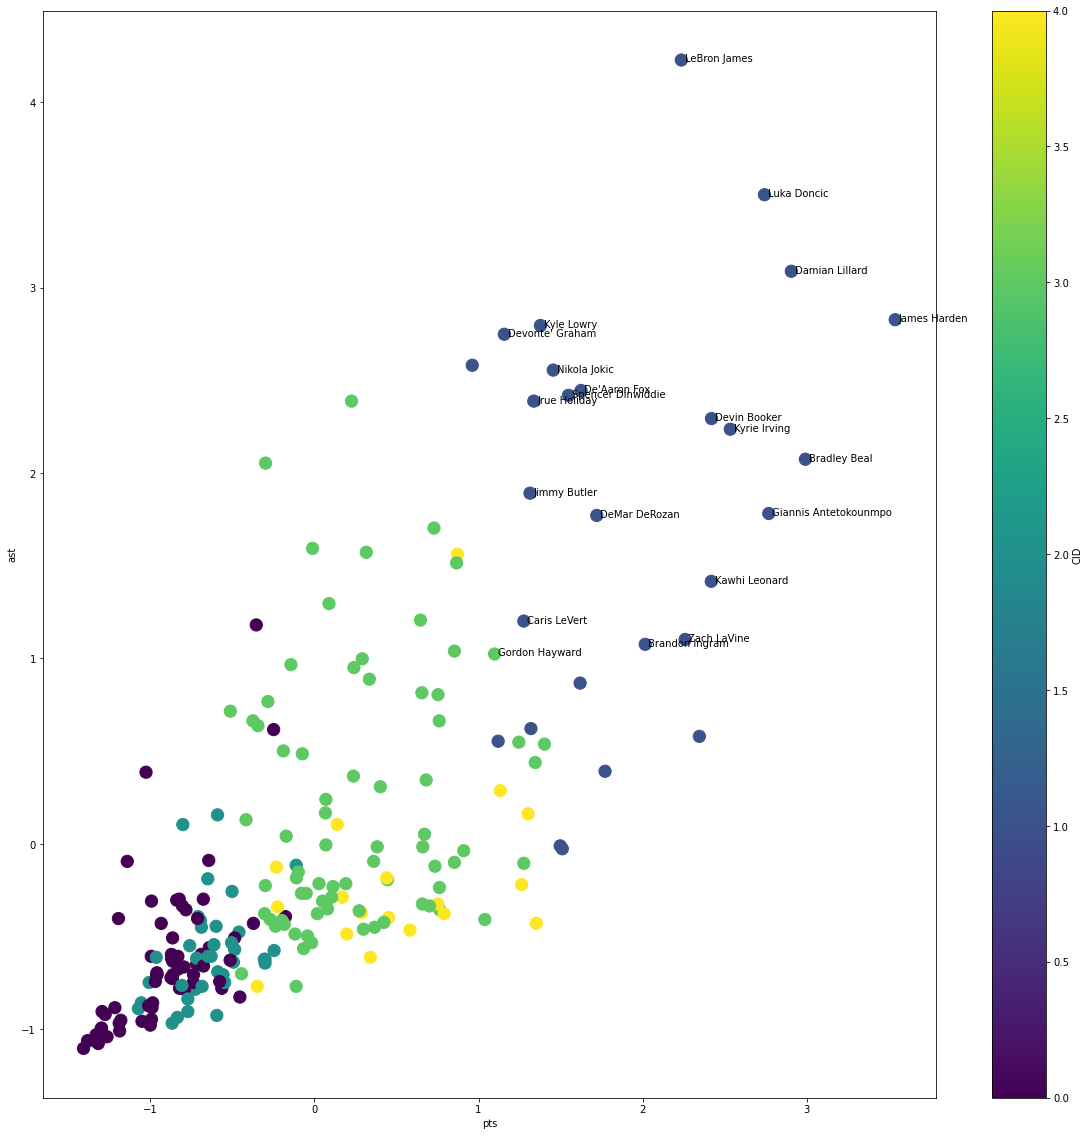

In [71]:
# graphs the kmeans cluster data based on points and assists 
ax = norm.plot.scatter(x='pts', y='ast', c='CID', cmap='viridis', s=150, figsize=(20,20), sharex=False)
for i in range(len(norm)):
    if norm.pts[i] >= 1 and norm.ast[i] >= 1:
        ax.text(norm.pts[i]+0.02, norm.ast[i]-0.01, norm.index[i])

Stakeholders that would be interested in this analysis are NBA team scouts, general managers, players, and/or betters. 

The linear regression analysis has a histogram and a scatter plot to visualize data. The histogram appears to follow a normal distribution of errors in predicting the points a player has scored. This means most predictions of player points were near perfect with few outliers. The scatter plot further illustrates the small error in predictions. It shows a linear trend between the actual points scored and the points predicted by the model, with few plot points deviating from the overall trend. 

A sports better would be most interested in this analysis because it predicts player points. Sports betters can use the model to increase their chances of hitting on their parlays, covering on spreads, or however they choose to wager their bets; the model could make sports betters more money.

The clustering analysis uses a scatter plot to visualize data, along with a kmeans cluster model. Each player was grouped into 1 of 5 categories depending on their zscore normalized average game statistics and plotted based on their points and assists. The data appears to follow a linear trend with some outliers. The visualization shows players in the dark purple category mostly near the top right, meaning they have high points and assists averages. The blue category of players are seen next behind the purple category in the clustered line, and the other 3 categories are mostly towards the bottom left of the graph and are hard to distinguish from each other.

NBA scouts, GMs, and players would all be interested in this data. NBA personnel would benefit from this data because it shows who the best players are in the NBA, and gives different tier players. This could help scouts and GMs when choosing who to add or drop from their team and could gives players more leverage when negotiating new contracts. The best players are in the purple category, with LeBron James appearing to be the overall best. The next tier of players are in the blue category. These players are most likely role players who are strong players, but not as good as the purple category. The subsequent tiers are all too close to distinguish from each other, meaning they would not be the most desired players for teams. 

The first analysis poses a potential ethical dilema. A better who recieves data on player is relying on the accuracy of the model to make bets with their money. If the model fails, they could get the impression the model is a scam and requests reperations for their lost money. 

The second analysis poses an ethical question regarding player salaries. If the analysis were to fail to predict the true value of a certain player, and that decrease their salary or a team's preference for them, they could be losing out on millions of dollars. However, this could also work in their favor if their statistical value exaggerated their true player value, and they got a larger salary then they might have deserved.